<a href="https://colab.research.google.com/github/Nayanatharapmc/Amazon_Sentiment_Analysis/blob/main/Sentiment_analysis_with_BERT_and_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Electronics Sentiment Analysis

##`Hugging Face Transformers`

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import transformers

In [58]:
# Loading datasets
apple_df = pd.read_csv('/content/drive/MyDrive/Apple_products.csv')
pixel_df = pd.read_csv('/content/drive/MyDrive/pixel_products.csv')
samsung_df = pd.read_csv('/content/drive/MyDrive/Samsung_products.csv')

## `1. Sentiment analysis using a pretrained sentiment analysis model in hugging face transformers library`

This approach utilizes the transformers library to perform sentiment analysis using a pre-trained pipeline. It initializes a sentiment analysis pipeline using a pre-trained model for sentiment analysis task.

In [59]:
from transformers import pipeline

# Load pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Example reviews
reviews = apple_df['text'].tolist()

# Analyze sentiment
results = sentiment_pipeline(reviews)
for review, result in zip(reviews, results):
    print(f"Review: {review}\nSentiment: {result['label']} - Score: {result['score']}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Review: perfect
Sentiment: POSITIVE - Score: 0.9998517036437988

Review: So far extremely happy with the iPhone 6.  This works perfectly for what it was purchased for and nice to have the larger storage.  Wasn't sure what iPhone to get, but very happy with this purchase and would highly recommend to anyone looking to get one.  While it isn't the latest model, it still has many of the extra added features advertised by Apple.  no regrets and happy to have this one
Sentiment: POSITIVE - Score: 0.999749481678009

Review: I would not recommend buying any electronics from this company; my phone came defected.
Sentiment: NEGATIVE - Score: 0.9979175925254822

Review: Battery is trashed essentially making the phone unusable.  Complete waste of money.
Sentiment: NEGATIVE - Score: 0.9997871518135071

Review: This is literally a brand new phone for a used phone price. I could not find a single scratch on this phone. I am so happy with this purchase. Saved a ton of money too.
Sentiment: POSITIVE -

In [65]:
# Combine the results with the 'method1 result' column in apple_df
for i in range(len(results)):
    if results[i]['label'] == 'POSITIVE':
        apple_df.at[i, 'Method1_result'] = results[i]['score']
    elif results[i]['label'] == 'NEGATIVE':
        apple_df.at[i, 'Method1_result'] = -1 * results[i]['score']
    else:
        apple_df.at[i, 'Method1_result'] = results[i]['score']


In [69]:
apple_df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Method1_result
0,5.0,Five Stars,perfect,[],B00NQHZ2RU,B00NQHZ2RU,AGYCCDOVYOOUDZOETUJN4U5KAGIA,1486140013000,0,True,0.999852
1,5.0,LOVE this iPhone 6,So far extremely happy with the iPhone 6. Thi...,[],B00NQGOZCY,B00NQGOZCY,AHGSUXT56Q3XVYD6J3YBZMBOCXHA,1495430457000,2,True,0.999749
2,1.0,Malfunction a lot,I would not recommend buying any electronics f...,[],B07234GKN5,B07234GKN5,AFV4KKH356TLSZEHI3UBHN4SYSJQ,1582741702541,2,True,-0.997918
3,1.0,Battery is done for.,Battery is trashed essentially making the phon...,[],B07CQNF813,B07CQNF813,AFTPWGVZUDMJE5UUADHHZBQK4AIQ,1581536080691,0,True,-0.999787
4,5.0,Brand new phone,This is literally a brand new phone for a used...,[],B09JFN8K6T,B09JFN8K6T,AFBJCNQY5YUKIKOZT4OB2EQ7JWXA,1671675512431,3,True,0.997267
...,...,...,...,...,...,...,...,...,...,...,...
557,5.0,So far so good!,Phone was delivered ahead of schedule in a nic...,[],B07234GKN5,B07234GKN5,AG5PUKOPK44RN3AOBIKHZKBWF37Q,1547241048498,3,True,-0.991101
558,2.0,I need a refund or new phone please contact me!!!,The camera is very shaky when trying to take a...,[],B07234GKN5,B07234GKN5,AGXRAITRVQW7QS7EKOVLWK3LXNIA,1572410517164,2,True,-0.999763
559,1.0,It doesnt work!,I bought this an a month after I bought it it ...,[],B07234GKN5,B07234GKN5,AFCVQHOKT3O54IOHSS24XEFQHXMA,1572935042786,3,True,-0.999617
560,5.0,Good supplier,Product worked as expected,[],B07759SBP7,B07759SBP7,AH6OJZQU5RIK55HIDN2WUHNY6ZCA,1557508195982,0,True,0.980503


## `2. Sentiment Analysis with BERT pretrained model (nlptown/bert-base-multilingual-uncased-sentiment)`

In [2]:
! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.7/839.7 MB 821.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5

In [70]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

`Instantiate model`

In [7]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [71]:
def get_sentiment(df):
  reviews = []
  texts = df['text'].to_list()
  for text in texts:
    tokens = tokenizer.encode(text, return_tensors='pt')
    result = model(tokens)
    reviews.append(int(torch.argmax(result.logits))+1)
  return reviews


In [72]:
reviews = get_sentiment(apple_df)
print(reviews)

[5, 5, 1, 1, 5, 5, 5, 1, 5, 4, 4, 5, 5, 5, 1, 4, 5, 5, 5, 1, 5, 4, 5, 3, 1, 5, 5, 4, 5, 3, 2, 5, 5, 1, 5, 1, 3, 5, 5, 4, 5, 5, 4, 1, 5, 1, 5, 1, 5, 5, 2, 5, 5, 5, 5, 4, 5, 3, 3, 1, 5, 5, 5, 5, 3, 3, 4, 5, 4, 1, 1, 2, 4, 5, 5, 4, 1, 5, 1, 2, 5, 5, 3, 5, 5, 1, 4, 1, 1, 5, 5, 1, 1, 5, 5, 5, 5, 5, 1, 1, 4, 1, 5, 5, 5, 4, 1, 5, 5, 2, 5, 5, 5, 1, 1, 4, 5, 5, 5, 2, 5, 5, 5, 2, 5, 1, 5, 5, 3, 5, 1, 3, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 1, 5, 5, 2, 5, 2, 5, 1, 5, 5, 1, 3, 5, 5, 3, 3, 5, 3, 5, 1, 5, 1, 1, 5, 5, 1, 1, 5, 3, 4, 1, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 2, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 2, 5, 2, 5, 4, 5, 5, 3, 5, 1, 5, 2, 2, 5, 4, 4, 1, 5, 4, 1, 4, 5, 1, 1, 5, 5, 4, 1, 5, 1, 4, 5, 5, 1, 2, 5, 5, 5, 2, 4, 5, 1, 5, 4, 5, 1, 1, 2, 5, 5, 5, 2, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 4, 5, 1, 4, 2, 1, 4, 5, 5, 3, 2, 4, 4, 1, 3, 5, 1, 5, 5, 5, 1, 1, 5, 1, 5, 2, 1, 5, 5, 5, 3, 3, 5, 5, 1, 1, 5, 4, 1, 5, 1, 3, 5, 5, 5, 5, 5, 2, 5, 5, 5, 2, 1, 5, 1, 5, 4, 5, 5, 5, 1, 5, 

In [75]:
# Add reviews to the apple_df
apple_df['Method2_result'] = reviews

In [78]:
apple_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Method1_result,Method2_result
0,5.0,Five Stars,perfect,[],B00NQHZ2RU,B00NQHZ2RU,AGYCCDOVYOOUDZOETUJN4U5KAGIA,1486140013000,0,True,0.999852,5
1,5.0,LOVE this iPhone 6,So far extremely happy with the iPhone 6. Thi...,[],B00NQGOZCY,B00NQGOZCY,AHGSUXT56Q3XVYD6J3YBZMBOCXHA,1495430457000,2,True,0.999749,5
2,1.0,Malfunction a lot,I would not recommend buying any electronics f...,[],B07234GKN5,B07234GKN5,AFV4KKH356TLSZEHI3UBHN4SYSJQ,1582741702541,2,True,-0.997918,1
3,1.0,Battery is done for.,Battery is trashed essentially making the phon...,[],B07CQNF813,B07CQNF813,AFTPWGVZUDMJE5UUADHHZBQK4AIQ,1581536080691,0,True,-0.999787,1
4,5.0,Brand new phone,This is literally a brand new phone for a used...,[],B09JFN8K6T,B09JFN8K6T,AFBJCNQY5YUKIKOZT4OB2EQ7JWXA,1671675512431,3,True,0.997267,5


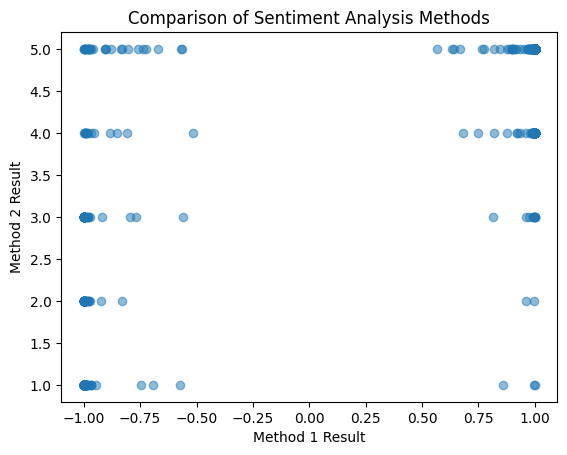

In [79]:
# @title Comparison of Sentiment Analysis Methods

import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(apple_df['Method1_result'], apple_df['Method2_result'], alpha=0.5)

# Add labels and title
plt.xlabel('Method 1 Result')
plt.ylabel('Method 2 Result')
_ = plt.title('Comparison of Sentiment Analysis Methods')


In [80]:
# Convert rating to int
apple_df['rating'] = apple_df['rating'].astype(int)

In [81]:
apple_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Method1_result,Method2_result
0,5,Five Stars,perfect,[],B00NQHZ2RU,B00NQHZ2RU,AGYCCDOVYOOUDZOETUJN4U5KAGIA,1486140013000,0,True,0.999852,5
1,5,LOVE this iPhone 6,So far extremely happy with the iPhone 6. Thi...,[],B00NQGOZCY,B00NQGOZCY,AHGSUXT56Q3XVYD6J3YBZMBOCXHA,1495430457000,2,True,0.999749,5
2,1,Malfunction a lot,I would not recommend buying any electronics f...,[],B07234GKN5,B07234GKN5,AFV4KKH356TLSZEHI3UBHN4SYSJQ,1582741702541,2,True,-0.997918,1
3,1,Battery is done for.,Battery is trashed essentially making the phon...,[],B07CQNF813,B07CQNF813,AFTPWGVZUDMJE5UUADHHZBQK4AIQ,1581536080691,0,True,-0.999787,1
4,5,Brand new phone,This is literally a brand new phone for a used...,[],B09JFN8K6T,B09JFN8K6T,AFBJCNQY5YUKIKOZT4OB2EQ7JWXA,1671675512431,3,True,0.997267,5


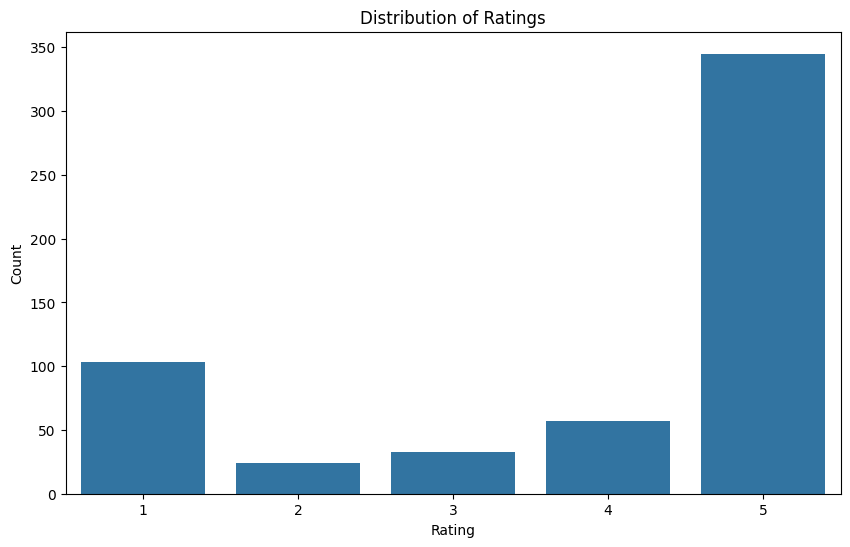

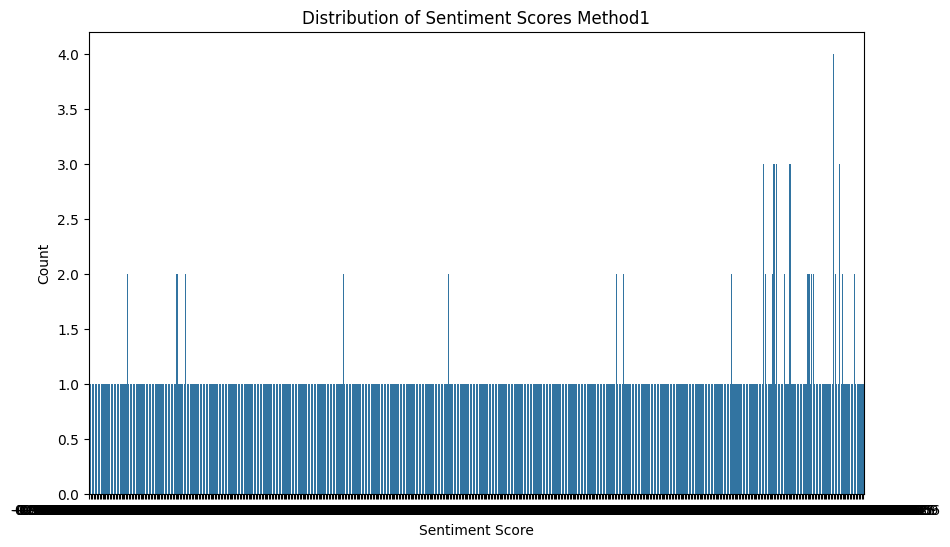

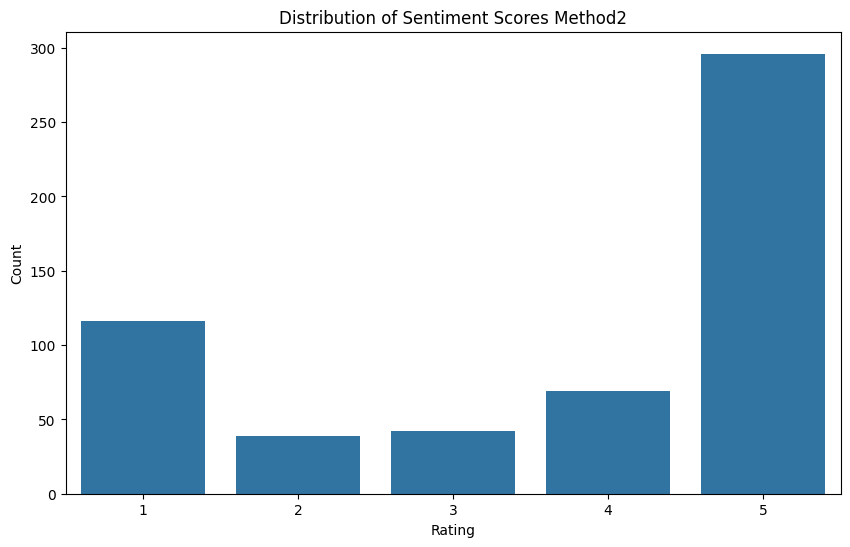

In [82]:
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=apple_df, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.countplot(data=apple_df, x='Method1_result')
plt.title('Distribution of Sentiment Scores Method1')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=apple_df, x='Method2_result')
plt.title('Distribution of Sentiment Scores Method2')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

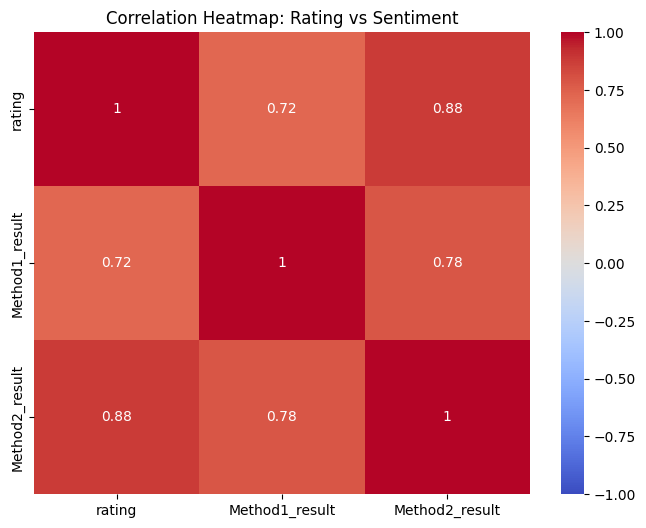

In [83]:
# Compute the correlation matrix
correlation_matrix = apple_df[['rating', 'Method1_result','Method2_result']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Rating vs Sentiment')
plt.show()

In [84]:
apple_df.to_csv('/content/drive/MyDrive/apple_processed_with_pretrained_models.csv')